# Details on the pt_tempo module

**For a description on how to use the most important functionality, please checkout the tutorials and the API documentation.**

The following example code shows how to use most of the functionality of the `tempo.pt_tempo` module (in comparison to the `tempo.tempo` module. This code is *suplementary* to the documentation and also includes functionality that is only relevant to the inner workings of the TimeEvolvingMPO package.

**Contents:**

* A: Independent Spin Boson Model
* B: TEMPO
* C: Process Tensor  TEMPO
* D: Analytic Solution
* E: Plots

In [1]:
import sys
sys.path.insert(0,'..')
import os
from time import time

os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'

import oqupy as tempo
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook

## A: Independent Spin Boson Model

In [2]:
Omega = 1.0
omega_cutoff = 3.0
alpha = 0.1
temperature = 0.0
start_time = 0.0
end_time = 10.0
initial_state = tempo.operators.spin_dm("y+")

system = tempo.System(0.0 * Omega * tempo.operators.sigma("x"))
correlations = tempo.PowerLawSD(alpha=alpha, 
                                zeta=3, 
                                cutoff=omega_cutoff, 
                                cutoff_type='exponential',
                                temperature=temperature)
bath = tempo.Bath(0.5 * tempo.operators.sigma("z"), correlations)

In [3]:
dt = 0.1 # 0.01
dkmax = 20 # 200
epsrel = 1.0e-6# 1.0e-7

## B: TEMPO

In [4]:
tempo_parameters = tempo.TempoParameters(dt=dt, dkmax=dkmax, epsrel=epsrel)
tempo_sys = tempo.Tempo(system=system,
                        bath=bath,
                        parameters=tempo_parameters,
                        initial_state=initial_state,
                        start_time=start_time)
tempo_sys.compute(end_time=end_time, progress_type='bar')

dynamics = tempo_sys.get_dynamics()
t1, s1_y = dynamics.expectations(tempo.operators.sigma("y"), real=True)



100.0%  100 of  100 [########################################] 00:00:07
Elapsed time: 7.2s


## C: Process Tensor  TEMPO

In [5]:
pt_tempo_parameters = tempo.PtTempoParameters(dt=dt, dkmax=dkmax, epsrel=epsrel)
pt = tempo.pt_tempo_compute(bath=bath,
                            start_time=start_time,
                            end_time=end_time,
                            parameters=pt_tempo_parameters,
                            progress_type='bar')
pt.export("details_pt_tempo.processTensor",overwrite=True)

100.0%  100 of  100 [########################################] 00:00:15
Elapsed time: 15.6s


In [6]:
pt = tempo.import_process_tensor("details_pt_tempo.processTensor")

st = time()
state = pt.compute_final_state_from_system(system=system, initial_state=initial_state)
et = time()

print(et-st)
print(state)

0.14472365379333496
[[ 4.99881145e-01-9.17751980e-12j -2.20515655e-10-4.08998184e-01j]
 [ 2.16078951e-10+4.08998184e-01j  4.99881145e-01-9.18312075e-12j]]


In [7]:
st = time()
dyn = pt.compute_dynamics_from_system(system=system, initial_state=initial_state)
et = time()
print(et-st)
print(dyn)

0.2734682559967041
----------------------------------------------
Dynamics object: __unnamed__
 __no_description__
  length        = 101 timesteps 
  min time      = 0.0 
  max time      = 10.0 



In [8]:
t2, s2_y = dyn.expectations(tempo.operators.sigma("y"), real=True)

## D: Analytic Solution

In [9]:
def analytic_solution(t):
    x = (t*omega_cutoff)**2
    phi = 2 * alpha * (1 + (x-1)/(x+1)**2)
    return np.exp(-phi)
sy_exact = analytic_solution(t1)

## E: Plots

<IPython.core.display.Javascript object>


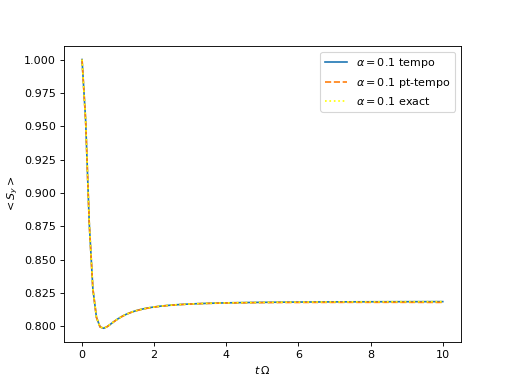

In [10]:
%matplotlib notebook
plt.plot(t1, s1_y, label=r'$\alpha=0.1$ tempo')
plt.plot(t2, s2_y, label=r'$\alpha=0.1$ pt-tempo', linestyle="dashed")
plt.plot(t1, sy_exact, label=r'$\alpha=0.1$ exact', linestyle="dotted", color="yellow")
plt.xlabel(r'$t\,\Omega$')
plt.ylabel(r'$<S_y>$')
plt.legend()

In [11]:
pt.get_bond_dimensions()

array([  1,   4,  15,  27,  34,  40,  44,  48,  53,  58,  62,  66,  71,
        76,  80,  85,  88,  92,  94,  97,  97, 100, 100, 101, 102, 101,
       103, 103, 103, 104, 104, 104, 104, 105, 105, 105, 105, 105, 105,
       105, 106, 106, 106, 106, 107, 107, 107, 107, 107, 107, 107, 107,
       108, 107, 107, 108, 107, 107, 108, 108, 108, 108, 108, 108, 108,
       108, 108, 108, 108, 108, 108, 108, 109, 108, 108, 109, 109, 108,
       108, 108, 109, 106, 100,  95,  89,  84,  78,  72,  67,  61,  56,
        50,  45,  39,  34,  28,  22,  16,   9,   3,   1])